# **IBM HR Analytics – Employee Attrition Analysis**
### Unified Mentor Internship Project 2
---
This notebook analyzes employee attrition using HR data and sky‑blue themed visualizations.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

color_blue = "#6EC6FF"
color_grey = "#90A4AE"

df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## **1. Dataset Overview**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## **2. Data Cleaning**

In [10]:
df['Attrition_Flag'] = df['Attrition'].map({'Yes':1, 'No':0})
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.head()

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,...,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,attrition_flag
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0


## **3. Exploratory Data Analysis**

### **Attrition Count**

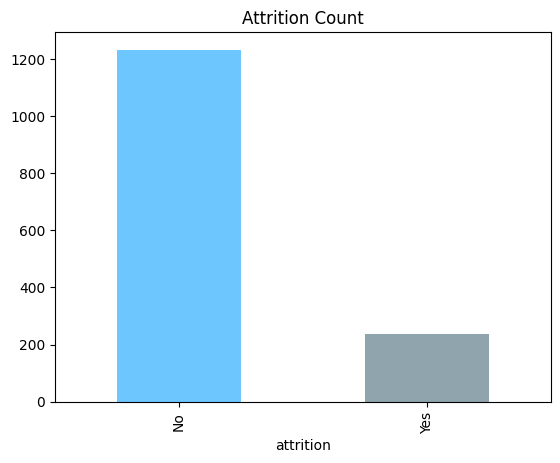

In [11]:
df['attrition'].value_counts().plot(kind='bar', color=[color_blue,color_grey]); plt.title("Attrition Count"); plt.show()

### **Age Distribution**

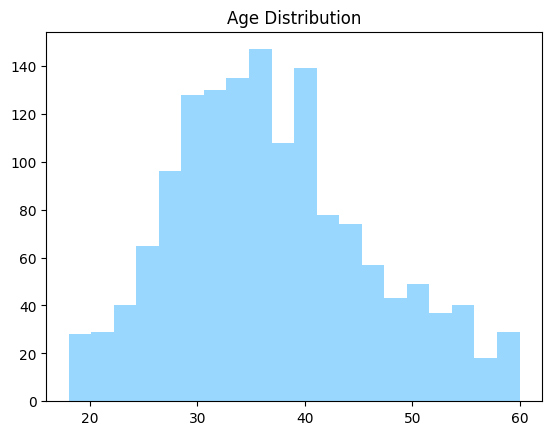

In [12]:
plt.hist(df['age'], bins=20, color=color_blue, alpha=0.7); plt.title("Age Distribution"); plt.show()

### **Attrition by Age (KDE)**

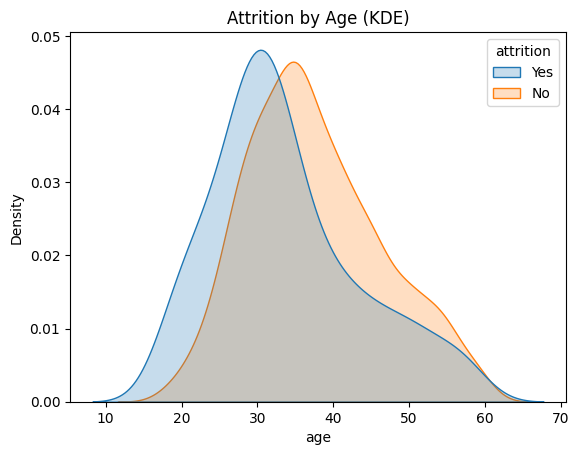

In [14]:
sns.kdeplot(data=df, x='age', hue='attrition', fill=True, common_norm=False)
plt.title("Attrition by Age (KDE)")
plt.show()


### **Attrition by Gender**

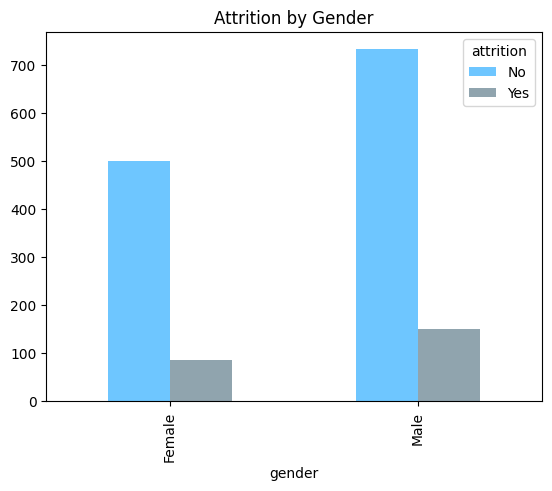

In [15]:
df.groupby(['gender','attrition']).size().unstack().plot(kind='bar', color=[color_blue,color_grey]); plt.title("Attrition by Gender"); plt.show()

### **Attrition by Department**

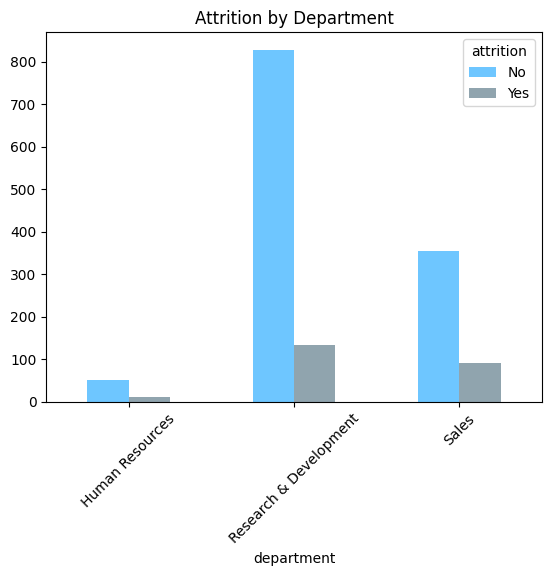

In [16]:
df.groupby(['department','attrition']).size().unstack().plot(kind='bar', color=[color_blue,color_grey]); plt.title("Attrition by Department"); plt.xticks(rotation=45); plt.show()

### **Attrition by Job Role**

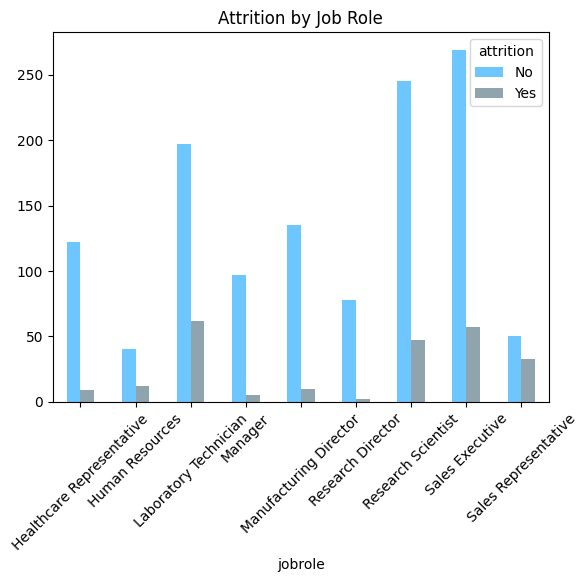

In [17]:
df.groupby(['jobrole','attrition']).size().unstack().plot(kind='bar', color=[color_blue,color_grey]); plt.title("Attrition by Job Role"); plt.xticks(rotation=45); plt.show()

### **Business Travel vs Attrition**

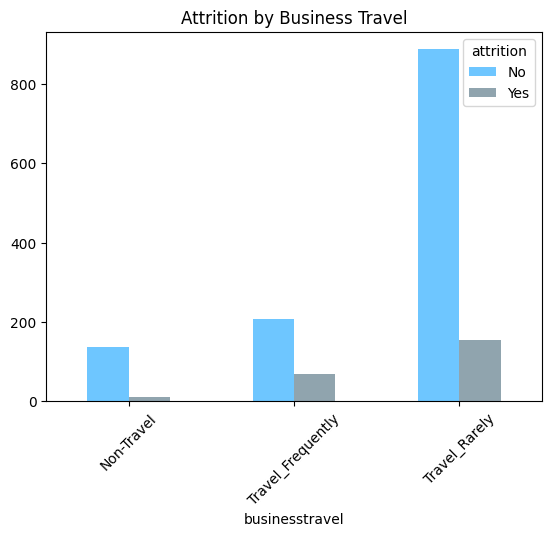

In [18]:
df.groupby(['businesstravel','attrition']).size().unstack().plot(kind='bar', color=[color_blue,color_grey]); plt.title("Attrition by Business Travel"); plt.xticks(rotation=45); plt.show()

### **Overtime vs Attrition**

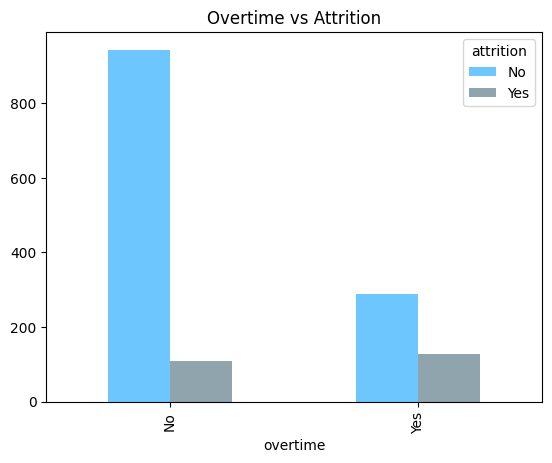

In [19]:
df.groupby(['overtime','attrition']).size().unstack().plot(kind='bar', color=[color_blue,color_grey]); plt.title("Overtime vs Attrition"); plt.show()

### **Monthly Income vs Attrition**

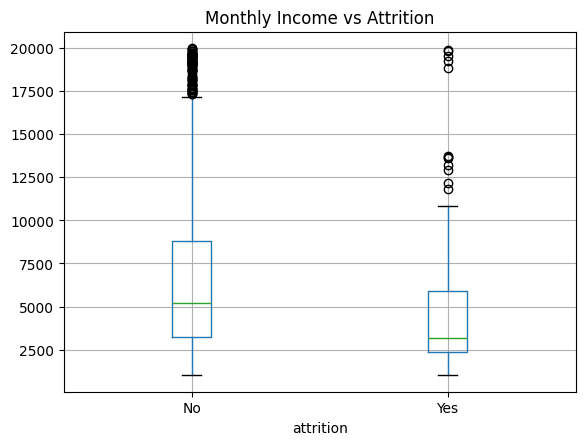

In [20]:
df.boxplot(column='monthlyincome', by='attrition'); plt.title("Monthly Income vs Attrition"); plt.suptitle(''); plt.show()

### **Correlation with Attrition**

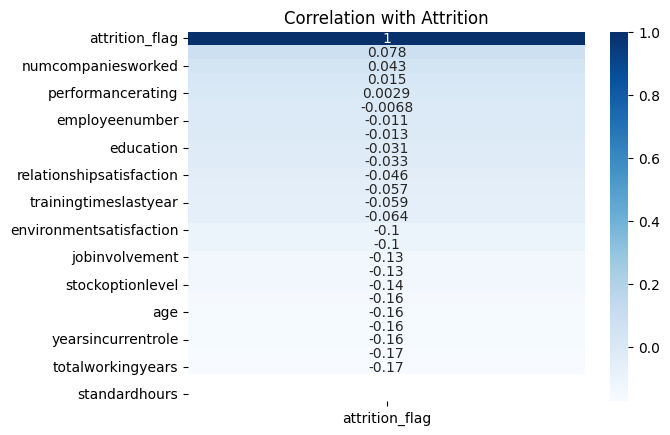

In [21]:
numeric_df = df.select_dtypes(include=['int64','float64']); sns.heatmap(numeric_df.corr()[['attrition_flag']].sort_values(by='attrition_flag', ascending=False), annot=True, cmap='Blues'); plt.title("Correlation with Attrition"); plt.show()

## **4. Insights Summary**
- Younger employees leave more
- Overtime increases attrition
- Sales department has highest turnover
- Frequent travelers leave more
- Low salary employees resign more
- Early‑career employees leave more

## **5. Recommendations**
- Reduce overtime
- Improve travel policy
- Increase compensation fairness
- Train and support sales roles
- Improve work‑life balance
- Create growth opportunities

## **6. Conclusion**
Attrition is influenced by workload, salary, travel, and experience. Targeted HR policies can reduce turnover rates.